In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline #Seanneta_202131099
import seaborn as sns

In [2]:
raw_data = pd.read_csv('ticketcinema.csv')
raw_data.head() #seanneta_202131099

,film_code,cinema_code,tickets_sold,tickets_out,show_time,ticket_use
0,1492,304,26,0,4,26
1,1492,352,42,0,5,42
2,1492,489,32,0,4,32
3,1492,429,12,0,1,12
4,1492,524,15,0,3,15


In [3]:
raw_data.info() #seanneta_202131099

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   film_code     142524 non-null  int64
 1   cinema_code   142524 non-null  int64
 2   tickets_sold  142524 non-null  int64
 3   tickets_out   142524 non-null  int64
 4   show_time     142524 non-null  int64
 5   ticket_use    142524 non-null  int64
dtypes: int64(6)
memory usage: 6.5 MB


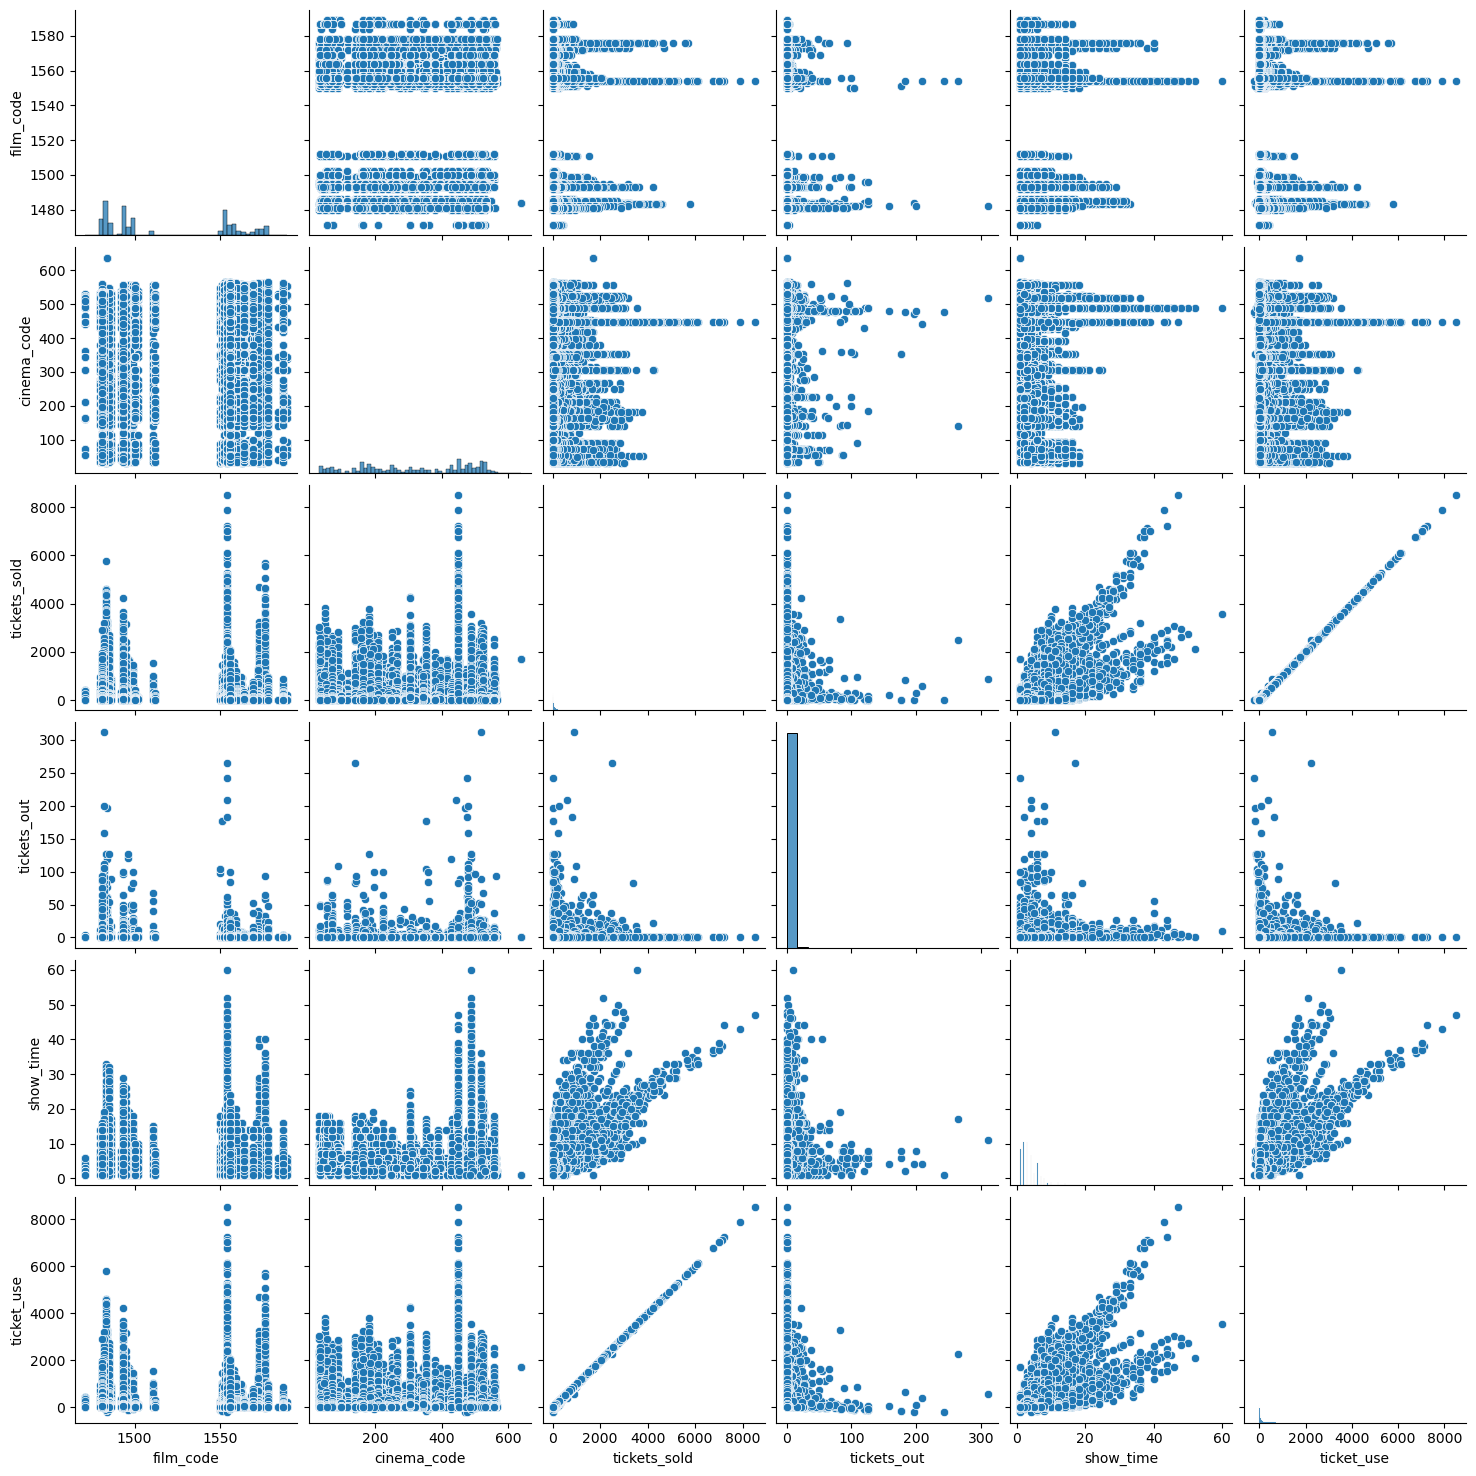

In [4]:
sns.pairplot(raw_data)

In [5]:
raw_data.columns #seanneta_202131099

Index(['film_code', 'cinema_code', 'tickets_sold', 'tickets_out', 'show_time',
       'ticket_use'],
      dtype='object')

In [6]:
x = raw_data[['film_code', 'cinema_code', 'tickets_sold', 'tickets_out', 'ticket_use']]
y = raw_data['show_time']

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print(model.coef_)
print(model.intercept_)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

[ 0.00715884 -0.00309434  0.01964732  0.03363895 -0.01399164]
-6.751565226877185


,Coeff
film_code,0.007159
cinema_code,-0.003094
tickets_sold,0.019647
tickets_out,0.033639
ticket_use,-0.013992


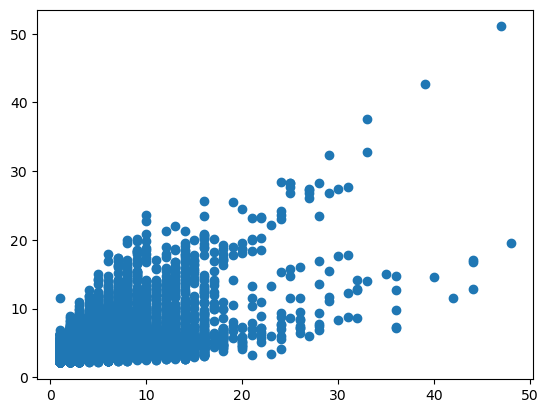

In [9]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

(array([2.5000e+01, 2.4400e+02, 2.4534e+04, 1.5560e+04, 1.8880e+03,
        4.3200e+02, 4.0000e+01, 2.3000e+01, 5.0000e+00, 7.0000e+00]),
 array([-13.62194867,  -9.1485197 ,  -4.67509072,  -0.20166174,
          4.27176723,   8.74519621,  13.21862519,  17.69205417,
         22.16548314,  26.63891212,  31.1123411 ]),
 <BarContainer object of 10 artists>)

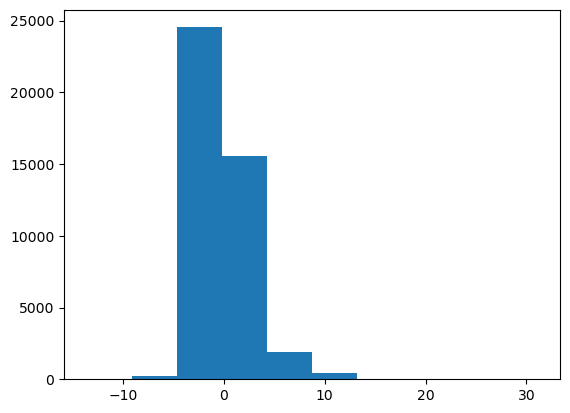

In [10]:
plt.hist(y_test - predictions)

In [11]:
import math
 
MSE = np.square(np.subtract(y_test, predictions)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

2.5344780286261925
